In [133]:
library(datasets)
library(graphics)
library(grDevices)
#library(lme4)
#library(lmerTest)
#library(car)
#library(carData)
#library(multcomp)
#library(lsmeans)
library(MASS)
library(ggplot2)
library(gridExtra)
library(methods)
library(Matrix)
#library(multcomp)
#library(mvtnorm)
library(stats)
library(survival)
#library(TH.data)
library(utils)
library(readr)
library(WRS2)
library(dunn.test)

In [5]:
data = read_csv('AA2_Avoid_Motor_Final_28_subjcts.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  ID = col_integer(),
  Cluster_avoid_cutoff_55 = col_integer(),
  Cluster_hierarc_method_complet = col_integer(),
  Perf_Group = col_integer(),
  Order = col_integer(),
  Last6Total = col_integer(),
  STAI_T = col_integer(),
  BIS = col_integer(),
  AllAR = col_integer(),
  STAIS_Group = col_integer(),
  BIS_Group = col_integer(),
  ID2 = col_integer(),
  STAIT_Groups = col_integer(),
  BISMedian_Group = col_integer(),
  VAR00006 = col_integer(),
  AR_Group = col_integer(),
  Age = col_integer(),
  Ancestry = col_integer(),
  Sex = col_integer(),
  Marital_Status = col_integer()
  # ... with 99 more columns
)
See spec(...) for full column specifications.


In [62]:
#colnames(data)

In [6]:
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==1]<-'good learners'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==2]<-'stable intermediate'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==3]<-'stable hyperavoiders'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==4]<-'stable hypo-avoiders'

data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==1]<- 'stable HyperAvoiders'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==2]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==3]<-'good learners'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==4]<- 'stable hypo-avoiders' 
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==5]<-'stable hypo-avoiders'

Warning message:
“Unknown or uninitialised column: 'Avoidance_clusters'.”

In [7]:
data <- data[!(is.na(data$Avoidance_clusters)), ]
data$Avoidance_clusters <- as.factor(data$Avoidance_clusters)

# ANXIETY

Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '≈' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '≈' in 'mbcsToSbcs': dot substituted for <89>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '≈' in 'mbcsToSbcs': dot substituted for <88>”

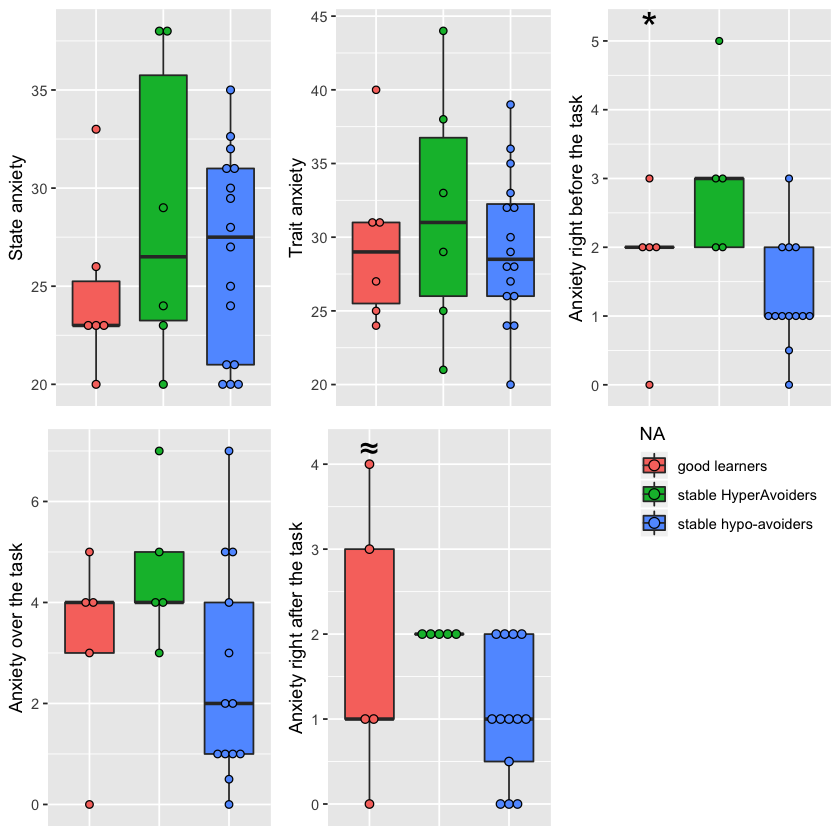

In [99]:
StaiSBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_S,
                                    fill=Avoidance_clusters))
StaiSPlot <- StaiSBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center") +
    labs(x="Avoidance cluster", y="State anxiety") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_T,
                                    fill=Avoidance_clusters))
StaiTPlot <- StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.5, stackdir="center") +
    labs(x="Avoidance cluster", y="Trait anxiety") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

VasPreBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Pre,
                                    fill=Avoidance_clusters))
VasPrePlot <- VasPreBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right before the task") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=5.2, label="*", size=9)

VasTaskPlot <- VasTaskBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety over the task") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

VasPostPlot <- VasPostBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center") +
    labs(x="Avoidance cluster", y="Anxiety right after the task") + 
    theme(legend.position=c(1.8,0.87)) + labs(fill=NA) +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=4.2, label="≈", size=7)

grid.arrange(StaiSPlot, StaiTPlot, VasPrePlot, VasTaskPlot, VasPostPlot,
                        ncol = 3, nrow = 2)

## Kruskal-Wallis rank sum tests for anxiety

In [132]:
print("STATE ANXIETY (STAI S)")
kruskal.test(data$STAI_S ~ data$Avoidance_clusters)
print("===========================================")
print("TRAIT ANXIETY (STAI T)")
kruskal.test(data$STAI_T ~ data$Avoidance_clusters)
print("===========================================")
print("VAS_Pre (anxiety right before the task)")
kruskal.test(data$VAS_Pre ~ data$Avoidance_clusters)
dunn.test(data$VAS_Pre, data$Avoidance_clusters, method='bh')
print("===========================================")
print("VAS_Task (anxiety over the task)")
kruskal.test(data$VAS_Task ~ data$Avoidance_clusters)
print("===========================================")
print("VAS_Post (anxiety right after the task)")
kruskal.test(data$VAS_Post ~ data$Avoidance_clusters)
dunn.test(data$VAS_Post, data$Avoidance_clusters, method='bh')

[1] "STATE ANXIETY (STAI S)"



	Kruskal-Wallis rank sum test

data:  data$STAI_S by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.91701, df = 2, p-value = 0.6322


[1] "==========================================="
[1] "TRAIT ANXIETY (STAI T)"



	Kruskal-Wallis rank sum test

data:  data$STAI_T by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.35114, df = 2, p-value = 0.839


[1] "==========================================="
[1] "VAS_Pre (anxiety right before the task)"



	Kruskal-Wallis rank sum test

data:  data$VAS_Pre by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.9371, df = 2, p-value = 0.0189


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 7.9371, df = 2, p-value = 0.02


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -1.332877
         |     0.1369
         |
stable h |   1.182955   2.784874
         |     0.1184    0.0080*

alpha = 0.05
Reject Ho if p <= alpha/2
[1] "==========================================="
[1] "VAS_Task (anxiety over the task)"



	Kruskal-Wallis rank sum test

data:  data$VAS_Task by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 3.4425, df = 2, p-value = 0.1788


[1] "==========================================="
[1] "VAS_Post (anxiety right after the task)"



	Kruskal-Wallis rank sum test

data:  data$VAS_Post by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.8502, df = 2, p-value = 0.08847


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 4.8502, df = 2, p-value = 0.09


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |   good lea   stable H
---------+----------------------
stable H |  -0.954087
         |     0.1700
         |
stable h |   1.013231   2.159901
         |     0.2332     0.0462

alpha = 0.05
Reject Ho if p <= alpha/2


# COPING STYLES

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bo

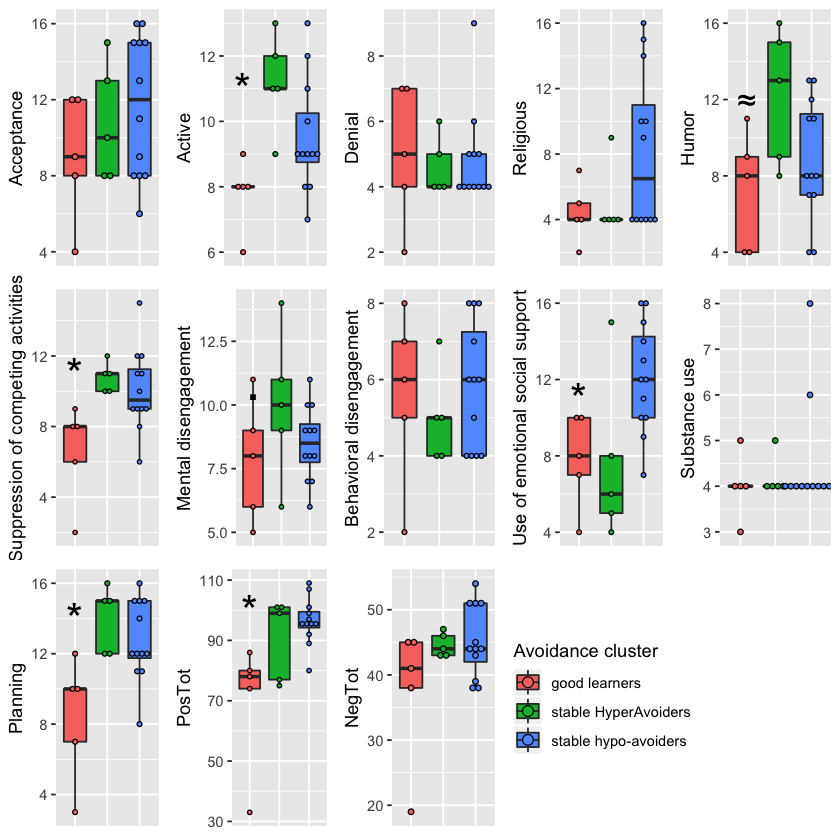

In [98]:
AcceptBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Accept,
                                    fill=Avoidance_clusters))
AcceptPlot <- AcceptBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center") +
    labs(x="Avoidance cluster", y="Acceptance") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




ActiveBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Active,
                                    fill=Avoidance_clusters))
ActivePlot <- ActiveBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Active") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label="*", size=9)




DenialBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Denial,
                                    fill=Avoidance_clusters))
DenialPlot <- DenialBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center") +
    labs(x="Avoidance cluster", y="Denial") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




ReligiousBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Religious,
                                    fill=Avoidance_clusters))
ReligiousPlot <- ReligiousBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Religious") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




HumorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Humor,
                                    fill=Avoidance_clusters))
HumorPlot <- HumorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Humor") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=12, label="≈", size=7)




SuppressBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Suppress,
                                    fill=Avoidance_clusters))
SuppressPlot <- SuppressBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Suppression of competing activities") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label="*", size=9)




MentalDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, MentalDis,
                                    fill=Avoidance_clusters))
MentalDisPlot <- MentalDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.18, stackdir="center") +
    labs(x="Avoidance cluster", y="Mental disengagement") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label=".", size=12)




BehDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BehDis,
                                    fill=Avoidance_clusters))
BehDisPlot <- BehDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.13, stackdir="center") +
    labs(x="Avoidance cluster", y="Behavioral disengagement") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




EmoSocBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, EmoSoc,
                                    fill=Avoidance_clusters))
EmoSocPlot <- EmoSocBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Use of emotional social support") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=11, label="*", size=9)



SubstBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Subst,
                                    fill=Avoidance_clusters))
SubstPlot <- SubstBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.12, stackdir="center") +
    labs(x="Avoidance cluster", y="Substance use") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())




PlanBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Plan,
                                    fill=Avoidance_clusters))
PlanPlot <- PlanBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.28, stackdir="center") +
    labs(x="Avoidance cluster", y="Planning") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=14, label="*", size=9)




PosTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, PosTot,
                                    fill=Avoidance_clusters))
PosTotPlot <- PosTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=1.5, stackdir="center") +
    labs(x="Avoidance cluster", y="PosTot") + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    annotate("text", x=1, y=100, label="*", size=9)



NegTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, NegTot,
                                    fill=Avoidance_clusters))
NegTotPlot <- NegTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.87, stackdir="center") +
    labs(x="Avoidance cluster", y="NegTot") + 
    theme(legend.position=c(2.05,0.5)) + labs(fill="Avoidance cluster") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

grid.arrange(AcceptPlot, ActivePlot, DenialPlot, ReligiousPlot, HumorPlot, SuppressPlot, MentalDisPlot,
             BehDisPlot, EmoSocPlot, SubstPlot, PlanPlot, PosTotPlot, NegTotPlot,
                        ncol = 5, nrow = 3)

## Kruskal-Wallis rank sum tests for coping styles

In [54]:
kruskal.test(data$Accept ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Accept by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.5569, df = 2, p-value = 0.4591


## Active coping style

In [55]:
kruskal.test(data$Active ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Active by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.6744, df = 2, p-value = 0.01307


## Denial coping style

In [56]:
kruskal.test(data$Denial ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Denial by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.3096, df = 2, p-value = 0.8566


## Religious coping style

In [57]:
kruskal.test(data$Religious ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Religious by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.8738, df = 2, p-value = 0.2377


## Humor coping style

In [58]:
kruskal.test(data$Humor ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Humor by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 4.7249, df = 2, p-value = 0.09419


## Suppression of competing activities coping style

In [59]:
kruskal.test(data$Suppress ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Suppress by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.5711, df = 2, p-value = 0.01377


## Mental disengagement coping style

In [60]:
kruskal.test(data$MentalDis ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$MentalDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 2.25, df = 2, p-value = 0.3247


## Behavioral disengagement coping style

In [61]:
kruskal.test(data$BehDis ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$BehDis by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.99869, df = 2, p-value = 0.6069


## Use of emotional social support coping style

In [62]:
kruskal.test(data$EmoSoc ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$EmoSoc by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.7491, df = 2, p-value = 0.02076


## Substance use coping style

In [63]:
kruskal.test(data$Subst ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Subst by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 0.55839, df = 2, p-value = 0.7564


## Planning coping style

In [64]:
kruskal.test(data$Plan ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$Plan by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 8.6351, df = 2, p-value = 0.01333


## PosTot

In [65]:
kruskal.test(data$PosTot ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$PosTot by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 7.8296, df = 2, p-value = 0.01994


## NegTot

In [66]:
kruskal.test(data$NegTot ~ data$Avoidance_clusters)


	Kruskal-Wallis rank sum test

data:  data$NegTot by data$Avoidance_clusters
Kruskal-Wallis chi-squared = 1.908, df = 2, p-value = 0.3852


'STAI_S' 'STAI_T' 'BIS' 'AI' 'AllAR' 'STAIS_Group' 'BIS_Group' 'ID2' 'STAIT_Groups'

'BISMedian_Group'   'ShockVolts' 'MeanBP_Avoid' 'Mean_BP_Motor' 'RT_ALL_Avoid' 'RT_ALL_Motor' 'RT_Early_Avoid' 'RT_Late_Avoid' 'RT_Early_Motor' 'RT_Late_Motor' 'Age' 'Ancestry' 'Sex' 'Marital_Status' 'Student' 'Education' 'Yrs_ed' 'WorkingNow'


'VAS_Pre' 'VAS_Post' 'VAS_Task' 'Change_group' 'SumChangePerf'  'PERF_LEARN_GROUP' 'AVG_1ST6' 'AVG_LAST6' 'DIFF'  'Chg2Grp' 'PosRein_Sub' 'Vent_Sub' 'InsSoc_Sub' 'Res_Sub' 'Active_Sub' 'Passive_Sub' 



COPE inventory
“the active coping, planning, suppression, restraint, instrumental social support, emotional social support, positive reinterpretation, acceptance, religion, venting, denial, behavioral disengagement, mental disengagement, and substance use subscales of the COPE”



Barrat’s Impulsivity Scale
'“the attention, motor, self-control, cognitive coping, and perseverance subscales, as well as the total score for the BIS”


'BIS_Total' 'BIS_Attention' 'BIS_Motor' 'BIS_SlfCtl' 'BIS_CogCpx' 'BIS_Prsvr' 'BIS_CogIns' 'BIS_AttImp' 'BIS_MtrImp' 'BIS_NPlImp


Intrinsic Motivation Inventory
“the interest/enjoyment, perceived competence, perceived choice,
and pressure/tension subscales, as well as the total score for the IMI”

'IMITotal' 'IMIInterest' 'IMICompetence' 'IMIEffort' 'IMIPressure' 'IMIRelated'